In [22]:
# pandas for df structures and operations for manipulating numerical tables and time series
import pandas
from pandas.plotting import scatter_matrix


# matplotlib.pyplot for df plots
import matplotlib.pyplot as plt

# sklearn for machine learning methods
from sklearn import tree
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import scipy.stats as stats
from scipy.stats import zscore


# for numeric calculations
import numpy as np

# from utilities import visualize_classifier
from sklearn.linear_model import LinearRegression
import sklearn.metrics as sm
from sklearn.metrics import r2_score

import seaborn as sns

In [23]:
df = pandas.read_csv("Cleaned-HR-Employee-Attrition.csv")

df.head()

,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,3,1,0,8,0,1,6,4,0,5
1,1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,...,4,4,1,10,3,3,10,7,1,7
2,2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,...,3,2,0,7,3,3,0,0,0,0
3,3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,...,3,3,0,8,3,3,8,7,3,0
4,5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,8,...,3,3,0,8,2,2,7,7,3,6


In [24]:
# Re-encode so Yes = 1, No = 0
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

In [25]:
# Select all the columns that are not numeric
data_column_category = df.select_dtypes(exclude=[np.number]).columns

In [26]:
# View column categories
data_column_category

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')

In [27]:
# Print the first five rows of the new dataframe
df[data_column_category].head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,Travel_Frequently,Research & Development,Life Sciences,Male,Laboratory Technician,Single,No


In [28]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [29]:
label_encoder = LabelEncoder()

In [30]:
# Make a copy of your DataFrame
df_label_encoded = df.copy()

In [31]:
# Performing label encoding
for i in data_column_category:
    df_label_encoded[i] = label_encoder.fit_transform(df_label_encoded[i])

In [32]:
# View the label encoded data
print("Label Encoded Data: ")
df_label_encoded.head()

Label Encoded Data: 


,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41,1,2,1102,2,1,2,1,1,...,3,1,0,8,0,1,6,4,0,5
1,1,49,0,1,279,1,8,1,1,2,...,4,4,1,10,3,3,10,7,1,7
2,2,37,1,2,1373,1,2,2,4,4,...,3,2,0,7,3,3,0,0,0,0
3,3,33,0,1,1392,1,3,4,1,5,...,3,3,0,8,3,3,8,7,3,0
4,5,32,0,1,1005,1,2,2,1,8,...,3,3,0,8,2,2,7,7,3,6


In [33]:
df_label_encoded.head()

,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41,1,2,1102,2,1,2,1,1,...,3,1,0,8,0,1,6,4,0,5
1,1,49,0,1,279,1,8,1,1,2,...,4,4,1,10,3,3,10,7,1,7
2,2,37,1,2,1373,1,2,2,4,4,...,3,2,0,7,3,3,0,0,0,0
3,3,33,0,1,1392,1,3,4,1,5,...,3,3,0,8,3,3,8,7,3,0
4,5,32,0,1,1005,1,2,2,1,8,...,3,3,0,8,2,2,7,7,3,6


In [34]:
df[['YearsAtCompany', 'MonthlyIncome', 'HourlyRate', 'MonthlyRate', 'DailyRate']].corr()

,YearsAtCompany,MonthlyIncome,HourlyRate,MonthlyRate,DailyRate
YearsAtCompany,1.000000,0.366335,-0.032626,-0.024382,0.006956
MonthlyIncome,0.366335,1.000000,-0.015309,0.074515,0.020581
HourlyRate,-0.032626,-0.015309,1.000000,-0.014806,0.042485
MonthlyRate,-0.024382,0.074515,-0.014806,1.000000,-0.019582
DailyRate,0.006956,0.020581,0.042485,-0.019582,1.000000


In [36]:
corr = df_label_encoded.corr()['MonthlyIncome'].sort_values(ascending=False)
print(corr)

MonthlyIncome               1.000000
JobLevel                    0.869368
TotalWorkingYears           0.542708
YearsAtCompany              0.366335
YearsInCurrentRole          0.329167
YearsWithCurrManager        0.319620
Age                         0.279494
Department                  0.212149
YearsSinceLastPromotion     0.129862
NumCompaniesWorked          0.122775
Education                   0.095033
MonthlyRate                 0.074515
DistanceFromHome            0.053343
StockOptionLevel            0.042727
WorkLifeBalance             0.033560
OverTime                    0.030404
Unnamed: 0                  0.023590
EmployeeNumber              0.023367
DailyRate                   0.020581
BusinessTravel              0.004868
JobRole                     0.002855
TrainingTimesLastYear      -0.002963
JobSatisfaction            -0.005380
EnvironmentSatisfaction    -0.007414
PercentSalaryHike          -0.009537
RelationshipSatisfaction   -0.010843
EducationField             -0.011519
H

In [37]:
corr = df_label_encoded.corr()['YearsAtCompany'].sort_values(ascending=False)
print(corr)

YearsAtCompany              1.000000
YearsInCurrentRole          0.873244
YearsWithCurrManager        0.861552
TotalWorkingYears           0.520484
YearsSinceLastPromotion     0.405136
JobLevel                    0.397714
MonthlyIncome               0.366335
Age                         0.129891
StockOptionLevel            0.073445
Education                   0.057085
JobSatisfaction             0.039181
JobInvolvement              0.032199
Department                  0.031856
PerformanceRating           0.030925
EnvironmentSatisfaction     0.022019
TrainingTimesLastYear       0.013940
EmployeeNumber              0.010474
Unnamed: 0                  0.010198
DailyRate                   0.006956
WorkLifeBalance             0.004991
DistanceFromHome           -0.001540
Gender                     -0.014628
PercentSalaryHike          -0.015245
RelationshipSatisfaction   -0.017487
EducationField             -0.018412
JobRole                    -0.021092
MonthlyRate                -0.024382
H

In [38]:
feature_cols = ['JobLevel', 'TotalWorkingYears']

X = df_label_encoded[feature_cols]

# print the first 5 rows
X.head()

,JobLevel,TotalWorkingYears
0,2,8
1,2,10
2,1,7
3,1,8
4,1,8


In [39]:
y = df_label_encoded['MonthlyIncome']

# print the first 5 values
y.head()

0    5993
1    5130
2    2090
3    2909
4    3068
Name: MonthlyIncome, dtype: int64

In [40]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(1074, 2)


In [41]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(1074,)


In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [43]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(805, 2)
(805,)
(269, 2)
(269,)


In [44]:
y_test.head()

635    2210
428    2319
49     3388
204    2070
998    4771
Name: MonthlyIncome, dtype: int64

In [45]:
X_test.head()

,JobLevel,TotalWorkingYears
635,1,1
428,1,1
49,1,2
204,1,5
998,1,10


In [46]:
# create a model
linreg = LinearRegression()

# fit the model to our training df
linreg.fit(X_train, y_train)

LinearRegression()

In [47]:
print('b0 =', linreg.intercept_)
print('bi =', linreg.coef_)

b0 = -781.0428907853338
bi = [3109.77612537   46.82455678]


In [48]:
list(zip(feature_cols, linreg.coef_))

[('JobLevel', 3109.7761253732706), ('TotalWorkingYears', 46.824556779321185)]

In [49]:
y_test.head()

635    2210
428    2319
49     3388
204    2070
998    4771
Name: MonthlyIncome, dtype: int64

In [50]:
y_predicted = linreg.predict(X_test)

In [51]:
y_predicted

array([2375.55779137, 2375.55779137, 2422.38234815, 2562.85601848,
       2796.97880238, 2375.55779137, 2656.50513204, 9578.42573448,
       2375.55779137, 5859.93037098, 5953.57948453, 5859.93037098,
       2562.85601848, 2703.32968882, 5859.93037098, 5625.80758708,
       2328.73323459, 2796.97880238, 5766.28125742, 9016.53105313,
       6094.05315487, 6140.87771165, 2516.03146171, 2328.73323459,
       8969.70649635, 2609.68057526, 2562.85601848, 2469.20690493,
       2422.38234815, 6234.52682521, 2609.68057526, 8969.70649635,
       9531.6011777 , 3171.57525662, 2609.68057526, 6140.87771165,
       2796.97880238, 2703.32968882, 5859.93037098, 6140.87771165,
       5906.75492775, 2609.68057526, 2937.45247272, 5719.45670064,
       5813.1058142 , 5672.63214386, 2375.55779137, 9297.4783938 ,
       2375.55779137, 3218.3998134 , 5859.93037098, 5766.28125742,
       5719.45670064, 5906.75492775, 3031.10158628, 2469.20690493,
       5906.75492775, 5906.75492775, 5719.45670064, 2375.55779

In [52]:
from sklearn import metrics

In [53]:
print(metrics.mean_absolute_error(y_test, y_predicted))

934.0011619758222


In [54]:
print(metrics.mean_squared_error(y_test, y_predicted))

1638009.9763740038


In [55]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))

1279.847637953051


In [56]:
eV = round(sm.explained_variance_score(y_test, y_predicted), 2)
print('Explained variance score ',eV )

Explained variance score  0.74


In [57]:
r2_score(y_test, y_predicted)

0.7404345111672159

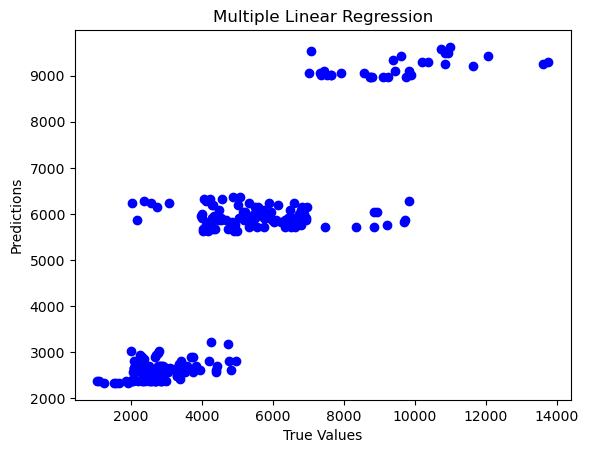

In [58]:
# Visualise the regression results
plt.title('Multiple Linear Regression')
plt.scatter(y_test, y_predicted, color='blue')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()